In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [4]:
# data is now our pandas DataFrame containing all of the data from our csv file
geo_df = pd.read_csv(ROOT_FOLDER + "eviction_with_geographic.csv",index_col=0)

In [ ]:
# geo_df

In [5]:
geo_df['other'] = (geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Some other race alone'] + geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:']- geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races including Some other race'])/geo_df['Estimate!!Total:'] * 100
geo_df['White'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!White alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Black or African American'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Asian'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Asian alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Native Hawaiian and Other Pacific Islander'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone']/geo_df['Estimate!!Total:'] * 100
geo_df['American Indian and Alaska Native'] = geo_df['Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone']/geo_df['Estimate!!Total:'] * 100
geo_df['Hispanic or Latino'] = geo_df['Estimate!!Total:!!Hispanic or Latino:']/geo_df['Estimate!!Total:'] * 100
geo_df['Minority'] = geo_df['Hispanic or Latino'] + geo_df['Black or African American'] + geo_df['Native Hawaiian and Other Pacific Islander'] + geo_df['American Indian and Alaska Native']

In [6]:
rcolumns=['Muni', 'White', 'Black or African American', 'Asian', 'Native Hawaiian and Other Pacific Islander',
           'American Indian and Alaska Native', 'other', 'Hispanic or Latino']

In [7]:
#brackets
one_to_ten_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/1kTO10K.csv',skiprows=1)
ten_to_fifty_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/10kTO50K.csv',skiprows=1)
fifty_to_90_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/50kTO90K.csv',skiprows=1)
ninty_to_200_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/90kTO200K.csv',skiprows=1)

In [8]:
edu_one_to_ten_k = geo_df[geo_df["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

low_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(rcolumns, axis=1)
top_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(2).filter(rcolumns, axis=1)

race_1 = pd.concat([low_three_1, top_three_1.reindex(index=top_three_1.index[::-1])])

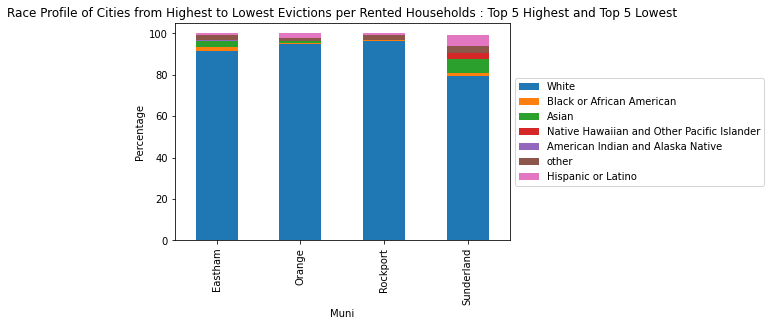

In [9]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_1.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [9]:
edu_ten_to_fifty_k = geo_df[geo_df["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]

low_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(rcolumns, axis=1)
top_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(2).filter(rcolumns, axis=1)

race_2 = pd.concat([low_three_2, top_three_2.reindex(index=top_three_2.index[::-1])])

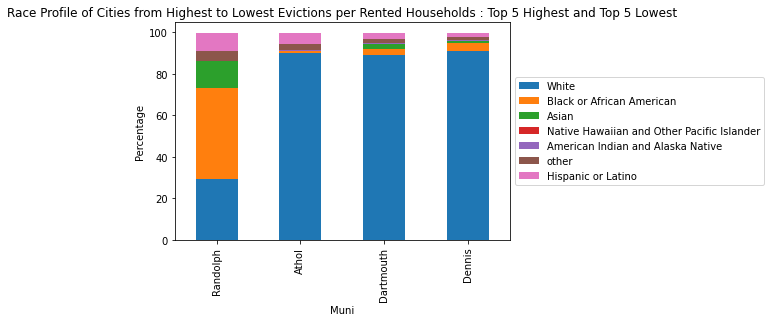

In [10]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_2.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [12]:
edu_ten_to_fifty_k

,Muni,Evictions per Rented Households,Eviction Numbers,Estimate!!Total:,Estimate!!Total:!!Not Hispanic or Latino:,Estimate!!Total:!!Not Hispanic or Latino:!!White alone,Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone,Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone,Estimate!!Total:!!Not Hispanic or Latino:!!Asian alone,Estimate!!Total:!!Not Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Not Hispanic or Latino:!!Some other race alone,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races excluding Some other race, and three or more races",Estimate!!Total:!!Hispanic or Latino:,Estimate!!Total:!!Hispanic or Latino:!!White alone,Estimate!!Total:!!Hispanic or Latino:!!Black or African American alone,Estimate!!Total:!!Hispanic or Latino:!!American Indian and Alaska Native alone,Estimate!!Total:!!Hispanic or Latino:!!Asian alone,Estimate!!Total:!!Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Hispanic or Latino:!!Some other race alone,Estimate!!Total:!!Hispanic or Latino:!!Two or more races:,Estimate!!Total:!!Hispanic or Latino:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Hispanic or Latino:!!Two or more races:!!Two races excluding Some other race, and three or more races",other,White,Black or African American,Asian,Native Hawaiian and Other Pacific Islander,American Indian and Alaska Native,Hispanic or Latino,Minority
11,Pittsfield,0.115463,852,42766,39875,35619,1737,55,860,36,94,1474,11,1463,2891,1514,168,26,0,0,879,304,105,199,3.640743,83.288126,4.061638,2.010943,0.084179,0.128607,6.760043,11.034467
12,Fitchburg,0.111670,777,40702,28990,25366,1482,121,942,0,45,1034,63,971,11712,7337,536,48,14,0,2840,937,511,426,2.496192,62.321262,3.641099,2.314383,0.000000,0.297283,28.774999,32.713380
15,Holyoke,0.075174,681,40241,18537,16636,1162,78,239,0,3,419,0,419,21704,18582,664,55,35,35,1721,612,141,471,1.048682,41.340921,2.887602,0.593922,0.000000,0.193832,53.935041,57.016476
19,Randolph,0.153765,584,34064,31054,10005,14890,27,4472,12,857,791,137,654,3010,929,339,0,38,0,1388,316,41,275,4.435768,29.371184,43.711837,13.128229,0.035228,0.079263,8.836308,52.662635
20,Marlborough,0.082129,540,39736,33751,27491,1522,0,2169,0,1490,1079,364,715,5985,2396,3,39,0,49,2936,562,314,248,5.549124,69.184115,3.830280,5.458526,0.000000,0.000000,15.061909,18.892188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Foxborough,0.002826,7,17727,16785,14848,1010,0,624,0,12,291,37,254,942,519,49,0,0,0,55,319,58,261,1.500536,83.759237,5.697524,3.520054,0.000000,0.000000,5.313928,11.011451
245,Norfolk,0.050000,7,11786,10892,9811,732,25,146,0,16,162,16,146,894,353,145,0,0,0,352,44,44,0,1.374512,83.242830,6.210759,1.238758,0.000000,0.212116,7.585271,14.008145
249,Longmeadow,0.010811,6,15791,14711,13331,150,0,933,0,1,296,0,296,1080,888,0,8,0,0,89,95,48,47,1.880818,84.421506,0.949908,5.908429,0.000000,0.000000,6.839339,7.789247
254,Weston,0.011173,6,12112,11655,9251,210,0,1567,0,175,452,62,390,457,298,15,18,0,0,102,24,0,24,4.664795,76.378798,1.733818,12.937583,0.000000,0.000000,3.773118,5.506935


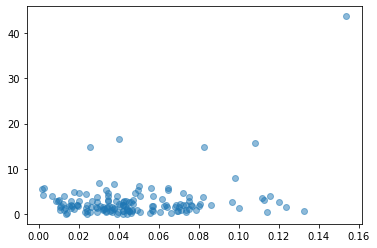

In [11]:
# edu_ten_to_fifty_k
plt.scatter(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k['Black or African American'], alpha=0.5)

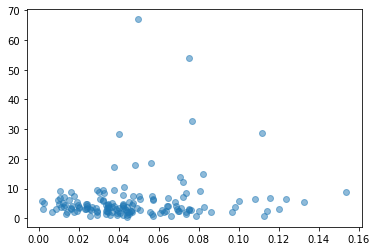

In [14]:
plt.scatter(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k['Hispanic or Latino'], alpha=0.5)

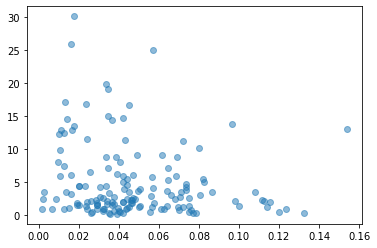

In [15]:
plt.scatter(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k['Asian'], alpha=0.5)

In [12]:
edu_fifty_to_90_k = geo_df[geo_df["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]
low_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(rcolumns, axis=1)
top_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(2).filter(rcolumns, axis=1)

race_3 = pd.concat([low_three_3, top_three_3.reindex(index=top_three_3.index[::-1])])

In [17]:
race_3

,Muni,White,Black or African American,Asian,Native Hawaiian and Other Pacific Islander,American Indian and Alaska Native,other,Hispanic or Latino
2,Fall River,77.225131,5.290419,1.879447,0.000000,0.138721,4.649394,10.538327
9,Framingham,62.972285,6.228910,7.793052,0.089893,0.356807,6.039442,16.108868
59,Brookline,68.043258,2.950321,17.333559,0.021967,0.047313,4.518418,6.779317
143,Newton,73.676250,2.832052,14.844288,0.009030,0.098202,3.347894,4.910094


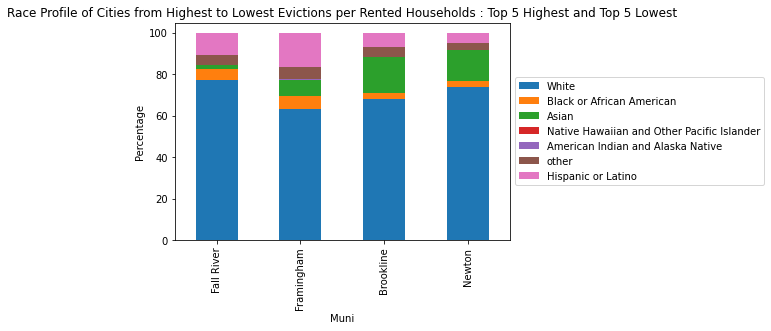

In [18]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_3.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

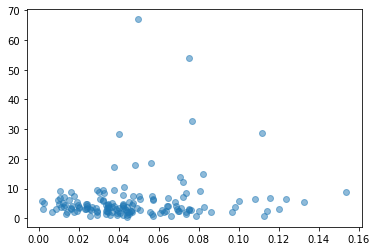

In [19]:
plt.scatter(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k['Hispanic or Latino'], alpha=0.5)

In [14]:
edu_ninty_to_200_k = geo_df[geo_df["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]

race_4 = edu_ninty_to_200_k[edu_ninty_to_200_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(rcolumns, axis=1)

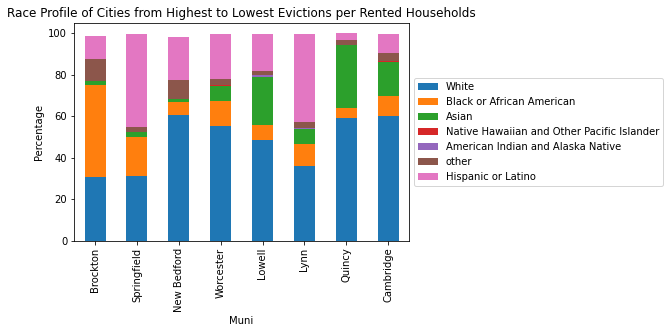

In [20]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households', color='black')
race_4.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

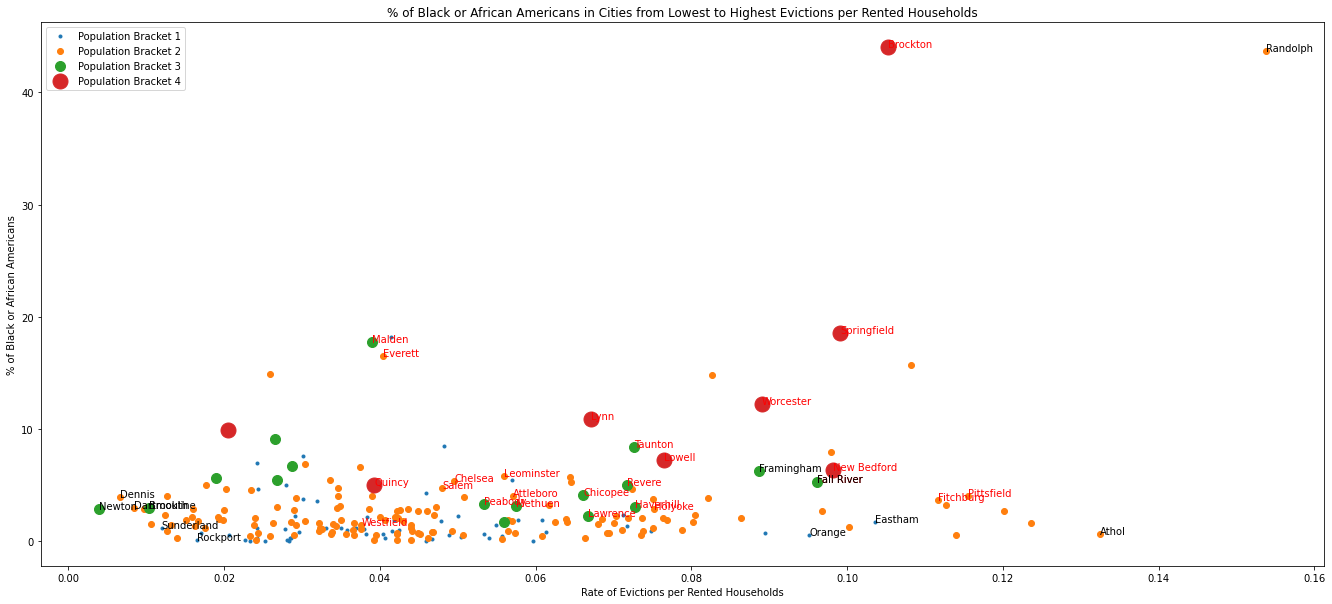

In [15]:
plt.figure(figsize=(23,10))
gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]

plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=10]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=10]["Black or African American"], 'o',
             label="Population Bracket 1", markersize=3)

for city in (race_1["Muni"].tolist()):
  plt.annotate(city, (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]["Black or African American"]))

plt.plot(edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10]["Black or African American"], 'o',
             label="Population Bracket 2")

for city in (race_2["Muni"].tolist()):
  plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Black or African American"]))


for city in gateway_cities: 
  if city in edu_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Black or African American"]), color='Red')


plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Black or African American"], 'o',
             label="Population Bracket 3", markersize=10)

for city in gateway_cities: 
  if city in edu_fifty_to_90_k["Muni"].tolist():
    plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Black or African American"]), color='Red')
    
for city in (race_3["Muni"].tolist()):
  plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Black or African American"]))

plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Black or African American"], 'o',
             label="Population Bracket 4", markersize=15)

for city in gateway_cities: 
  if city in edu_ninty_to_200_k["Muni"].tolist():
    plt.annotate(city, (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]["Black or African American"]), color='Red')


plt.title('% of Black or African Americans in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% of Black or African Americans")
plt.legend(numpoints=1)

plt.show()

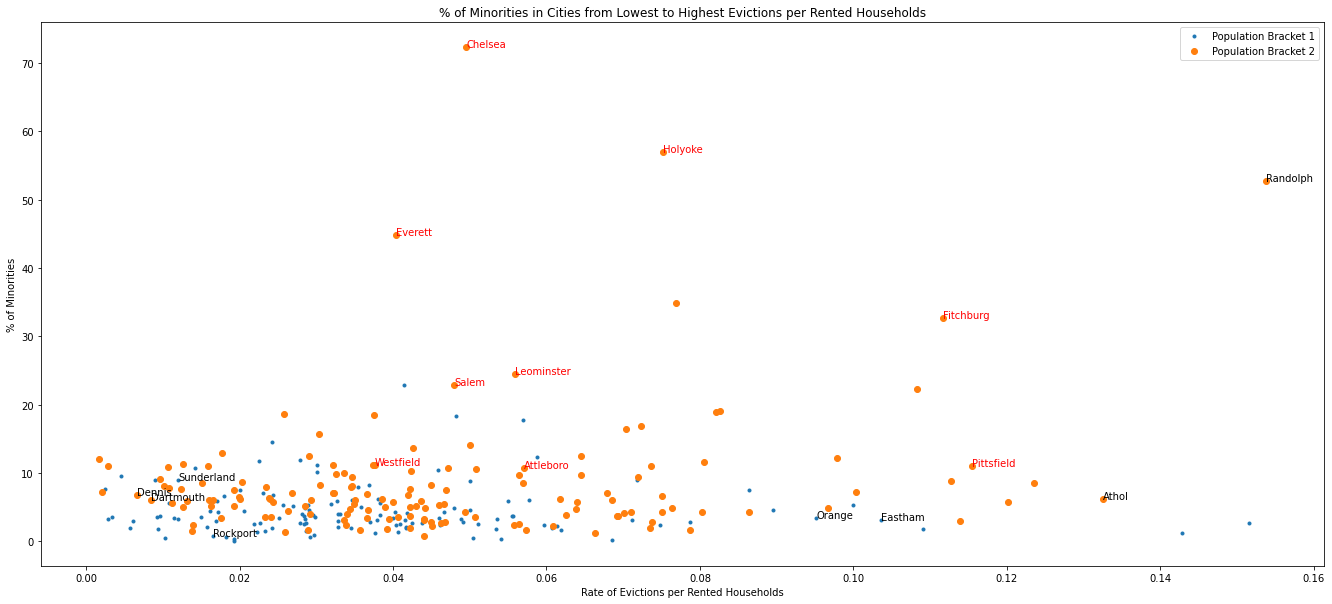

In [17]:
plt.figure(figsize=(23,10))

plt.plot(edu_one_to_ten_k['Evictions per Rented Households'], edu_one_to_ten_k["Minority"], 'o',
             label="Population Bracket 1", markersize=3)

for city in (race_1["Muni"].tolist()):
  plt.annotate(city, (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]["Minority"]))

plt.plot(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k["Minority"], 'o',
             label="Population Bracket 2")

for city in (race_2["Muni"].tolist()):
  plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Minority"]))


gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
for city in gateway_cities: 
  if city in edu_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Minority"]), color='Red')

# plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Minority"], 'o',
#              label="Population Bracket 3", markersize=10)

# for city in (race_3["Muni"].tolist()):
#   plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Minority"]))

# for city in gateway_cities: 
#   if city in edu_fifty_to_90_k["Muni"].tolist():
#     plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
#                             edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Minority"]), color='Red')


# plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Minority"], 'o',
#              label="Population Bracket 4", markersize=15)

# for city in gateway_cities: 
#   if city in edu_ninty_to_200_k["Muni"].tolist():
#     plt.annotate(city, (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]['Evictions per Rented Households'], 
#                             edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]["Minority"]), color='Red')

plt.title('% of Minorities in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% of Minorities")
plt.legend(numpoints=1)
plt.show()

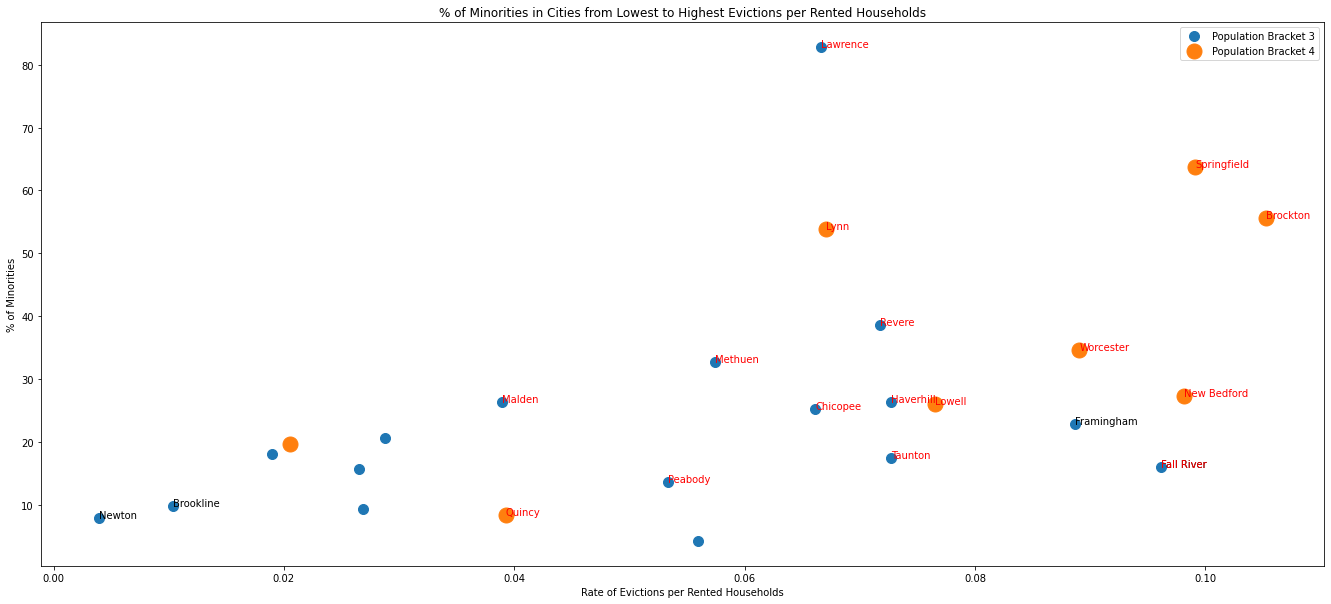

In [16]:
plt.figure(figsize=(23,10))

# plt.plot(edu_one_to_ten_k['Evictions per Rented Households'], edu_one_to_ten_k["Minority"], 'o',
#              label="Population Bracket 1", markersize=3)

# for city in (race_1["Muni"].tolist()):
#   plt.annotate(city, (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]["Minority"]))

# plt.plot(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k["Minority"], 'o',
#              label="Population Bracket 2")

# for city in (race_2["Muni"].tolist()):
#   plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Minority"]))


gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
# for city in gateway_cities: 
#   if city in edu_ten_to_fifty_k["Muni"].tolist():
#     plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
#                             edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Minority"]), color='Red')

plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Minority"], 'o',
             label="Population Bracket 3", markersize=10)

for city in (race_3["Muni"].tolist()):
  plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Minority"]))

for city in gateway_cities: 
  if city in edu_fifty_to_90_k["Muni"].tolist():
    plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Minority"]), color='Red')


plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Minority"], 'o',
             label="Population Bracket 4", markersize=15)

for city in gateway_cities: 
  if city in edu_ninty_to_200_k["Muni"].tolist():
    plt.annotate(city, (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]["Minority"]), color='Red')

plt.title('% of Minorities in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% of Minorities")
plt.legend(numpoints=1)
plt.show()

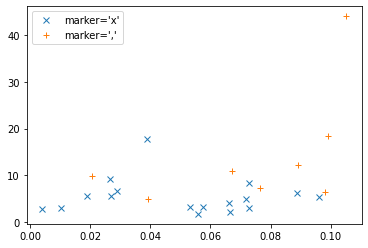

In [22]:
plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Black or African American"], 'x',
             label="marker='{0}'".format('x'))



plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Black or African American"], '+',
             label="marker='{0}'".format(','))
plt.legend(numpoints=1)

plt.show()

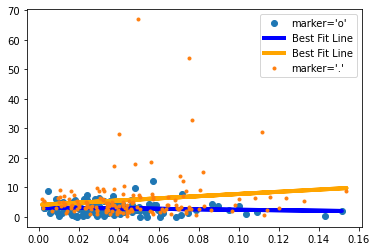

In [24]:
rate_edu = linear_model.LinearRegression().fit(np.array(edu_one_to_ten_k['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_one_to_ten_k["Hispanic or Latino"]).tolist())
regression_line = rate_edu.predict(np.array(edu_one_to_ten_k['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_one_to_ten_k['Evictions per Rented Households'], edu_one_to_ten_k["Hispanic or Latino"], 'o',
             label="marker='{0}'".format('o'))
plt.plot(edu_one_to_ten_k['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=4)

rate_edu = linear_model.LinearRegression().fit(np.array(edu_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_ten_to_fifty_k["Hispanic or Latino"]).tolist())
regression_line1 = rate_edu.predict(np.array(edu_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_ten_to_fifty_k['Evictions per Rented Households'], regression_line1, label='Best Fit Line', color='orange', linewidth=4)
plt.plot(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k["Hispanic or Latino"], '.',
             label="marker='{0}'".format('.'))

plt.legend(numpoints=1)
plt.show()

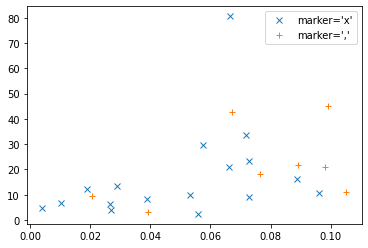

In [25]:
plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Hispanic or Latino"], 'x',
             label="marker='{0}'".format('x'))
plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Hispanic or Latino"], '+',
             label="marker='{0}'".format(','))
plt.legend(numpoints=1)

plt.show()